# End to end Breast Cancer Classifiction 
This notebook builds end to end breast cancer prediction classification using scikit learn.
We're going to break down our problem in multiple steps:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling


## 1. Problem Defination
In a statement,
> Given clinical parameters about a patient,can we predict wheather or not they have a breast cancer.
## 2. Data:
We're using data collected by wisonsin and used in a kaggle competition.
The Wisconsin Breast Cancer dataset is obtained from a prominent machine learning database named UCI machine learning database.
Link to the data: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv#
## 3. Evaluation:
The performance of the study is measured with respect to accuracy, sensitivity, specificity, precision, negative predictive value, false-negative rate, false-positive rate, F1 score, and Matthews Correlation Coefficient.
## 4. Features:
* Dictionary 

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant
## Before Modelling:
1. Understanding which type of  estimators to use:
   Our problem is to identify wheather a patient has breast cancer or not. We can use classification estimators over here.
2.  Installing the necessary tools
3. Preprocessing that data 
 


In [1]:
# Installing the tools
### import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
import pickle
%matplotlib inline 

In [2]:
#Load the data
df=pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

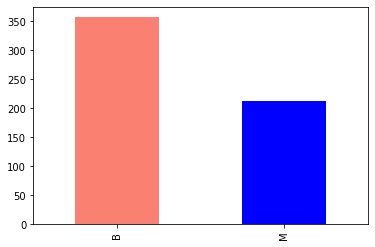

In [7]:
df["diagnosis"].value_counts().plot(kind='bar',color=['salmon','blue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#check for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Clean And Prepare the data
We can drop id and unnamed coloumns from the data since it's not required for our analysis

In [10]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#Turn categories into numbers:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#Coorelation factor
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


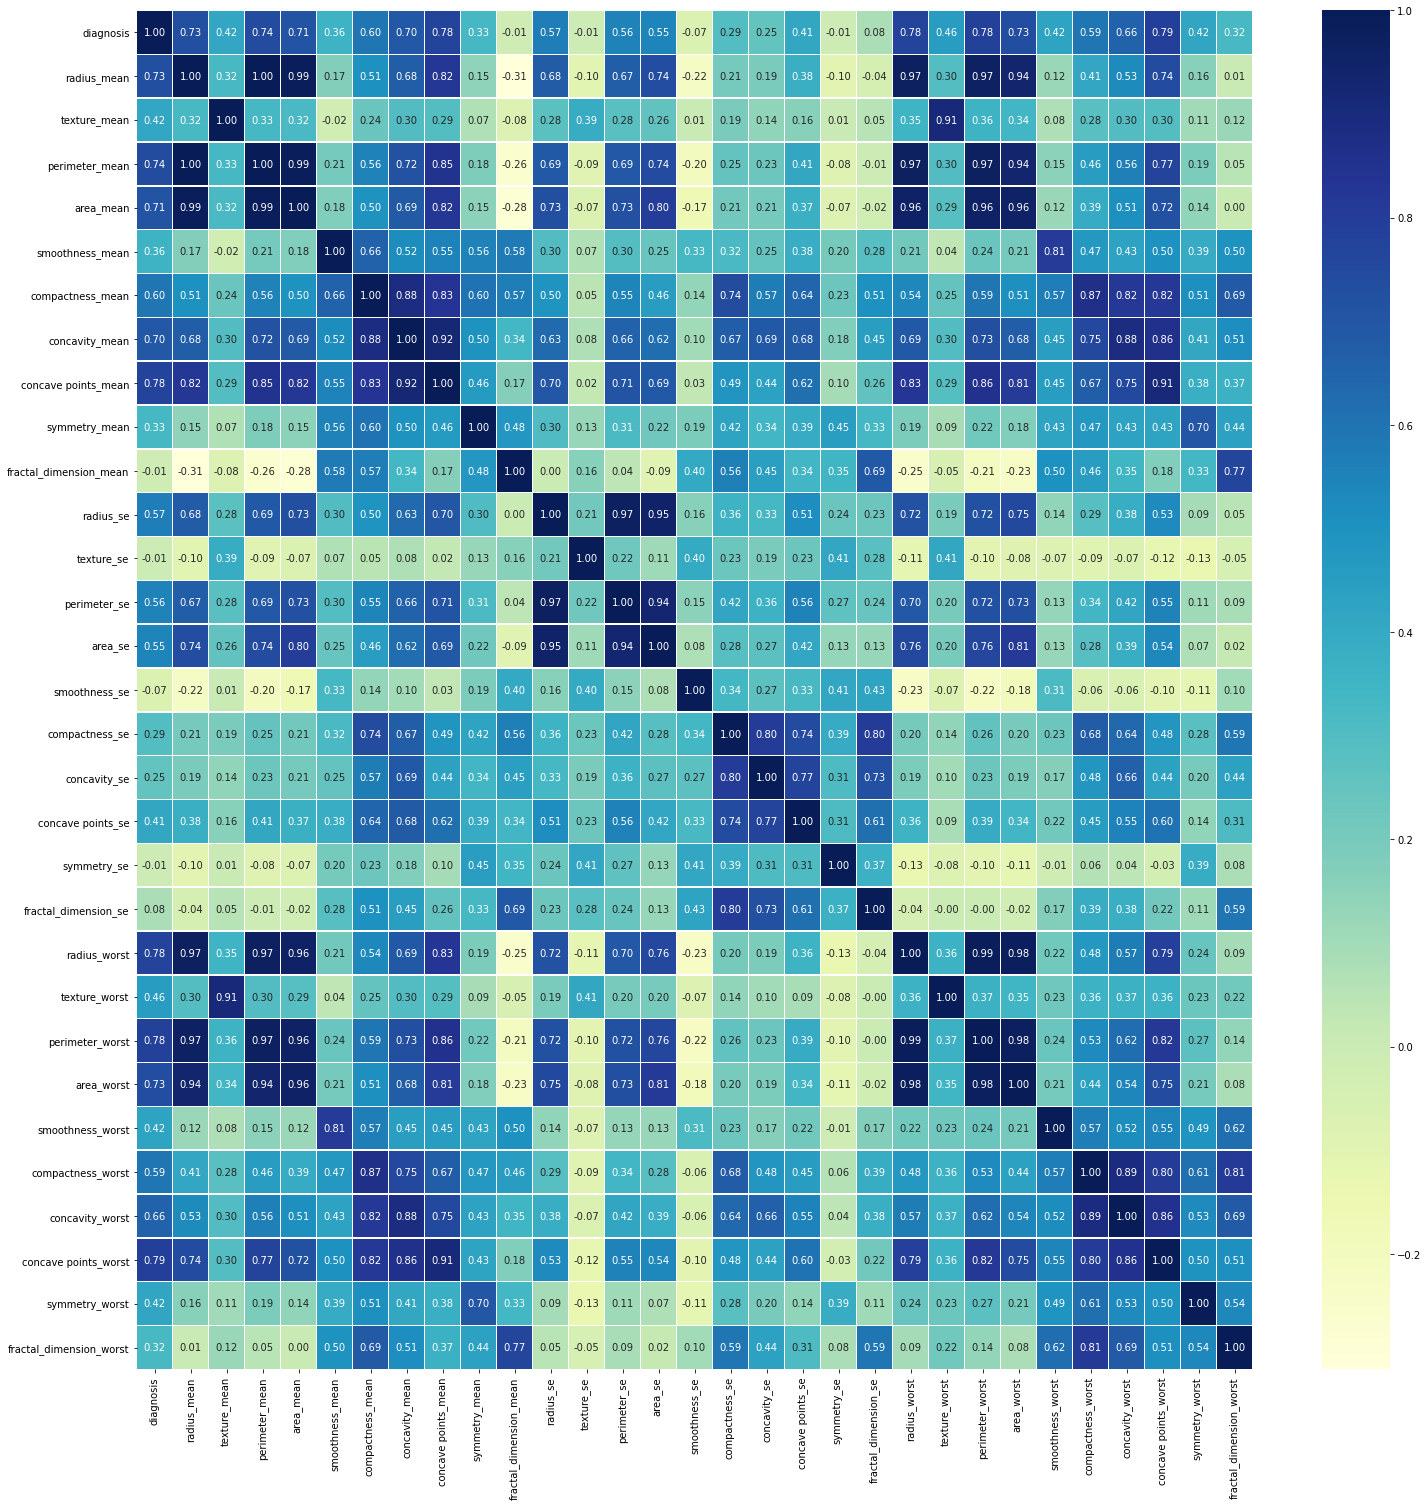

In [14]:
#Correlation factor

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(25,25))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='YlGnBu');

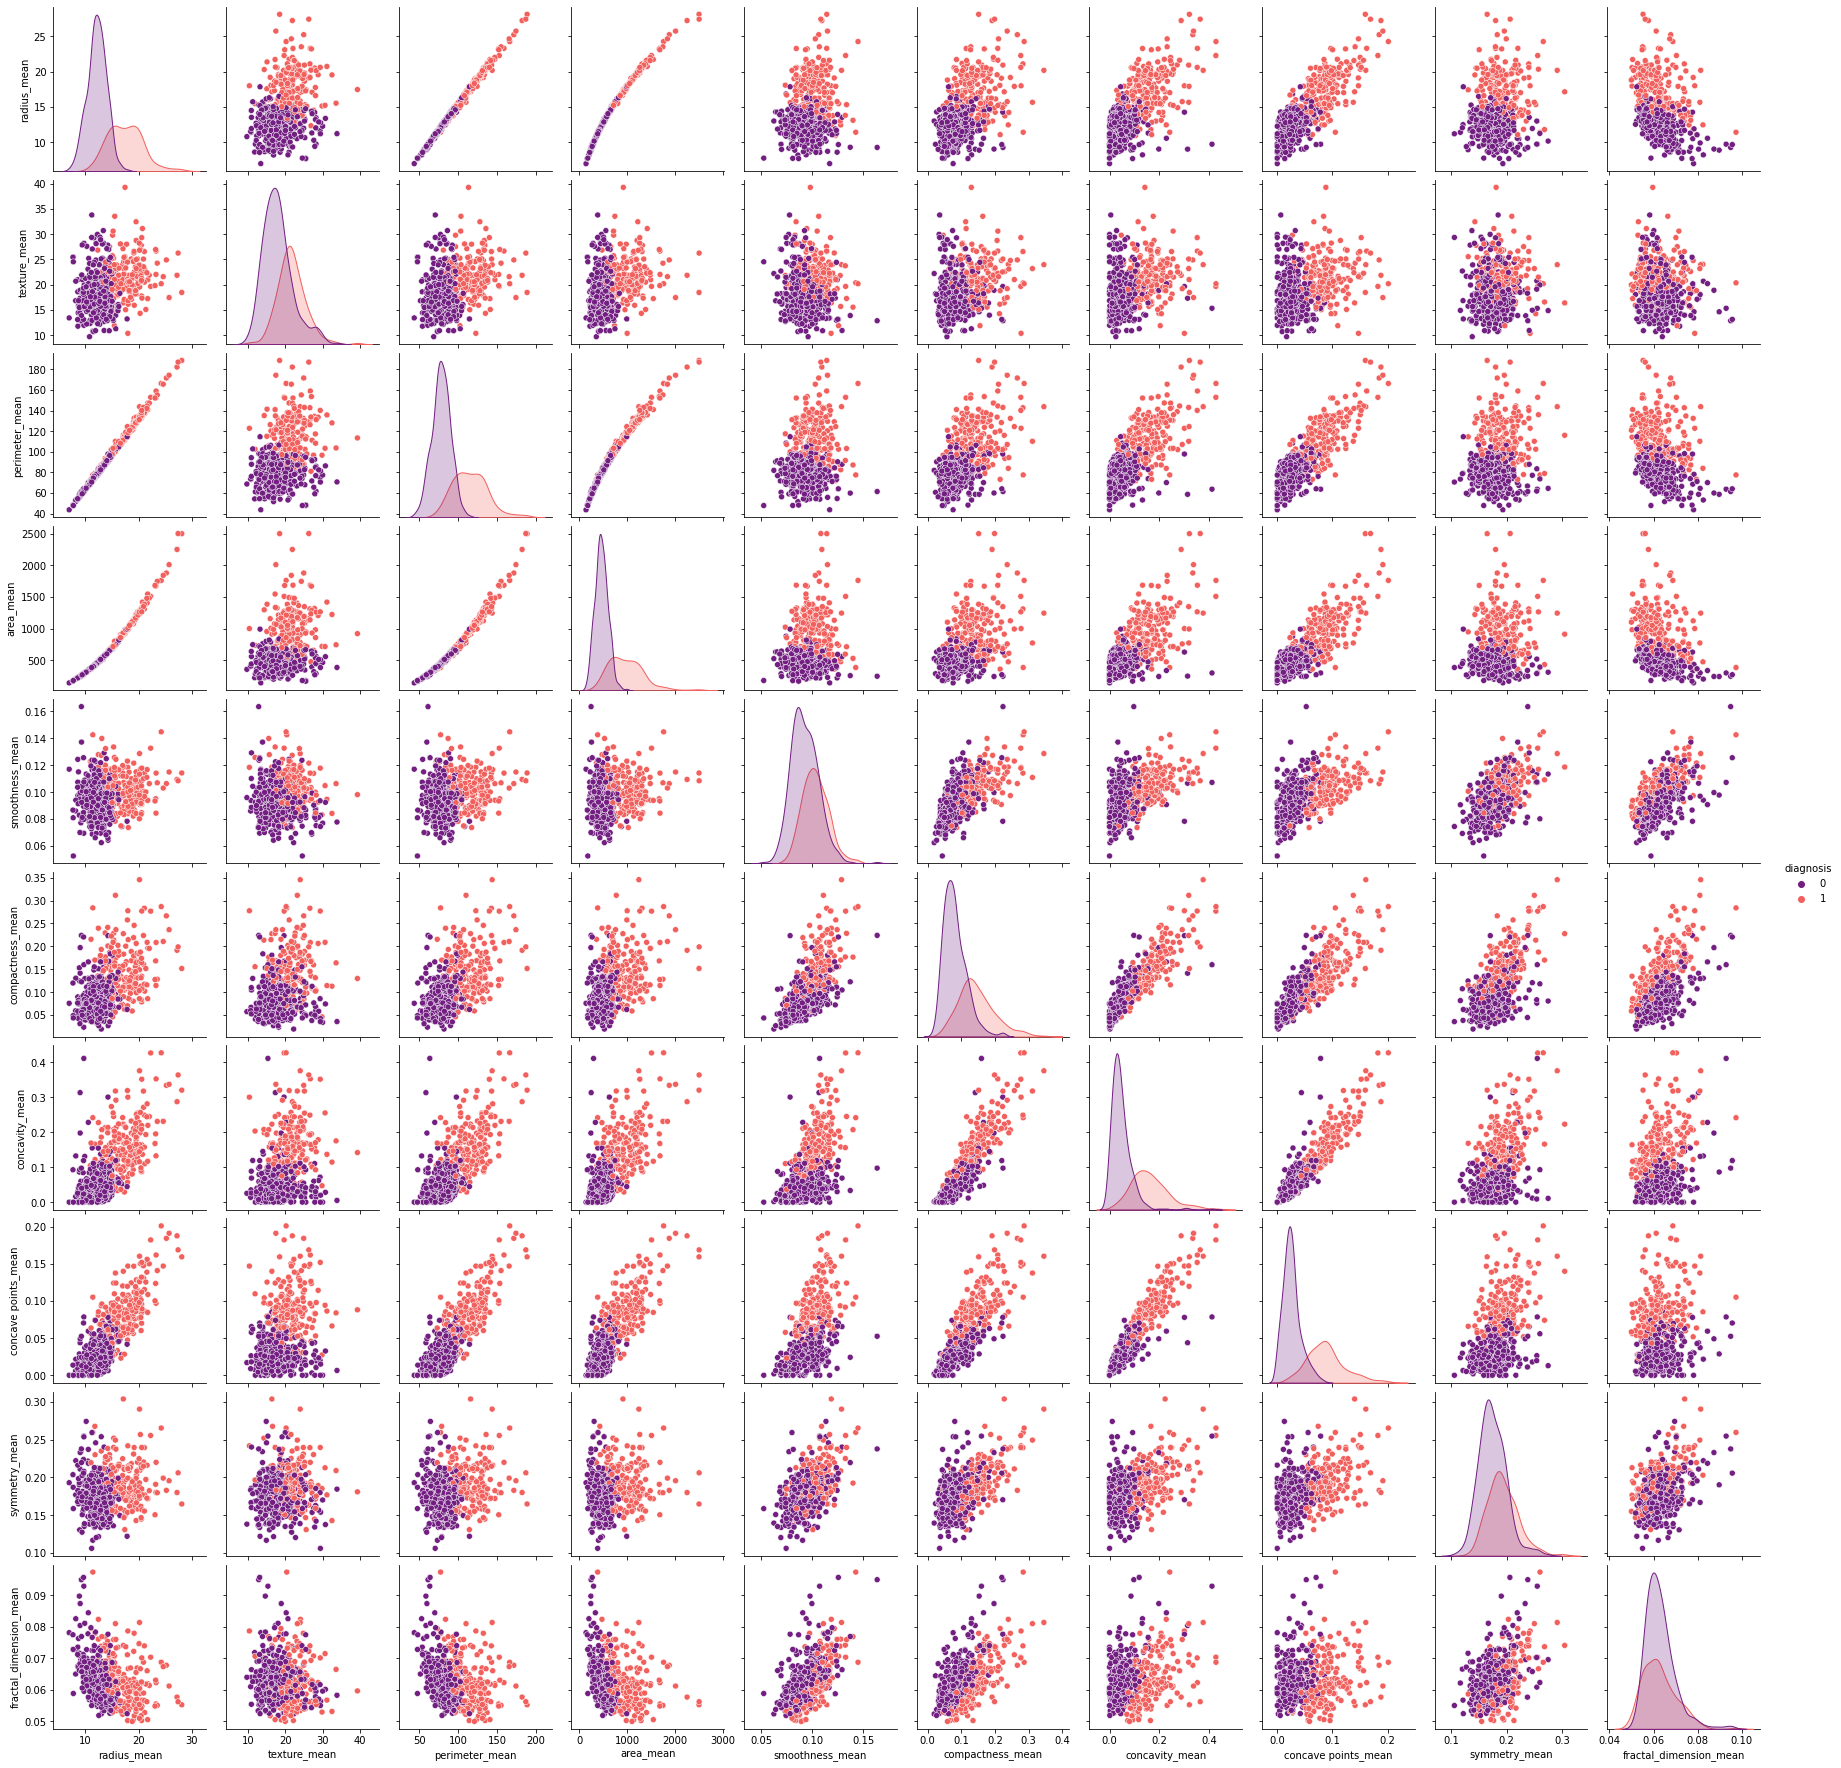

In [15]:
#Compare mean values 
cols=df.columns[:11]
sns.pairplot(data=df[cols],hue='diagnosis',palette='magma')

Almost perfectly linear patterns can be observed between the areas,perimeter and area feautures.Which can result in multicollinearity.
"multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant.

But we'll go ahead and see if we could achieve the accuracy ,if we don't then this area is something to look out for.



## Building a Model

In [16]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

In [18]:
### Feature Scaling
# -> To standardize data we use feature scaling.
# -> Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
def models(X_train,y_train):
  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier( random_state = 0)
  tree.fit(X_train, y_train)
    
   #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, random_state = 0)
  forest.fit(X_train, y_train)
    
  #Using Logistic Regression 

  from sklearn.linear_model import LogisticRegression
  logistic = LogisticRegression(random_state = 0)
  logistic.fit(X_train, y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)
    
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)
 
  


  
  #print model accuracy on the training data.
  print('[0]Decision Tree Classifier Training Accuracy:', tree.score(X_test, y_test))
  print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_test, y_test))
  print('[2]K Nearest Neighbor Training Accuracy:', knn.score(X_test, y_test))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_test, y_test))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_test, y_test))
  print('[5]Logistic Regression Training Accuracy:', logistic.score(X_test, y_test))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_test, y_test))

  return tree,svc_lin,knn, svc_rbf, gauss,logistic, forest

In [20]:
model = models(X_train,y_train)

[0]Decision Tree Classifier Training Accuracy: 0.9005847953216374
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9532163742690059
[2]K Nearest Neighbor Training Accuracy: 0.9473684210526315
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9590643274853801
[4]Gaussian Naive Bayes Training Accuracy: 0.935672514619883
[5]Logistic Regression Training Accuracy: 0.9473684210526315
[6]Random Forest Classifier Training Accuracy: 0.9415204678362573


In [21]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[94  7]
 [10 60]]
Model[0] Testing Accuracy = "0.9005847953216374!"

[[98  3]
 [ 5 65]]
Model[1] Testing Accuracy = "0.9532163742690059!"

[[100   1]
 [  8  62]]
Model[2] Testing Accuracy = "0.9473684210526315!"

[[99  2]
 [ 5 65]]
Model[3] Testing Accuracy = "0.9590643274853801!"

[[97  4]
 [ 7 63]]
Model[4] Testing Accuracy = "0.935672514619883!"

[[98  3]
 [ 6 64]]
Model[5] Testing Accuracy = "0.9473684210526315!"

[[101   0]
 [ 10  60]]
Model[6] Testing Accuracy = "0.9415204678362573!"



In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       101
           1       0.90      0.86      0.88        70

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.90      0.90      0.90       171

0.9005847953216374

Model  1
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
           1       0.96      0.93      0.94        70

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9532163742690059

Model  2
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       101
           1       0.98      0.89      0.93        70

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighte

When,we look into the model 4,6,0 we can identify there is less accuracy or less recall and f1-score,hence remove them and continue with the futher analysis.
We'll look into:

Logistic Regression Training Accuracy

Support Vector Machine (Linear Classifier) Training Accuracy

Support Vector Machine (RBF Classifier) Training Accuracy

In [23]:
#Cross -valuation scores
models=[]
from sklearn.svm import SVC
models.append(('RFS', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=25)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
#We can deduce to Support vector Machine
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)
preds=svc_rbf.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

In [ ]:
#Import ROC curve
#Plot ROC curve and calculate AUC metric
plot_roc_curve(svc_rbf,X_test,y_test);

In [ ]:
We are getting the best accuracy with SVM which is 96% and recall value of

* 6. Experimentation: We've been extremely lucky to find a good a precision model.But We still want to check if the model is overfitting in different cases.


In [ ]:
pickle.dump(svc_rbf, open('breast_Cancer_prediction_svc_model', 'wb'))